# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done first by hand on paper (attached a picture for your solution)**. Thereafter, check the results on the notebook with the pre-built functions.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}
\end{equation}

The **Prewitt masks**:
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}
\end{equation}

**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.

Consider the following image:

\begin{equation}
    {\mathbf Im} = \begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 1 & 0 & 1 & 1 & 0\\
    0 & 1 & 1 & 0 & 1 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}
\end{equation}





**a)** in order to find the 1D **differentiation filter**  for the sobel mask you simply consider the first row of the horizontal mask:

\begin{equation}
    {\mathbf d}_{x}= \begin{bmatrix} 1\; & 0\; & -1
\end{bmatrix}
\end{equation}
In order to find the 1D **smoothing filter**  for the sobel mask you simply consider the first column of the horizontal mask:

\begin{equation}
    {\mathbf s}_{x}= \begin{bmatrix} 1\; & 2\; & 1
\end{bmatrix}
\end{equation}

Now the same with the Prewitt mask:

\begin{equation}
    {\mathbf d}_{x}= \begin{bmatrix} 1\; & 0\; & -1
\end{bmatrix}
\end{equation}

\begin{equation}
    {\mathbf s}_{x}= \begin{bmatrix} 1\; & 1\; & 1
\end{bmatrix}
\end{equation}

**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


![b](images/conv.jpg)
![b](images/conv_1.jpg)


**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


![b](images/conv_2.jpg)


**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


In [1]:
import numpy as np
from scipy.signal import convolve2d


Im = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# Define the Prewitt masks
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Compute the gradients in the x and y directions using Prewitt masks using convolve2d
gradient_x_prewitt = convolve2d(Im, prewitt_horizontal, mode='same')

gradient_y_prewitt = convolve2d(Im, prewitt_vertical, mode='same')

print("Gradient in x direction using Prewitt mask:\n", gradient_x_prewitt)
print("Gradient in y direction using Prewitt mask:\n", gradient_y_prewitt)

Gradient in x direction using Prewitt mask:
 [[ 0  1  1 -1 -1  0]
 [ 1  1  1  0 -2 -1]
 [ 2  2  0  0 -2 -2]
 [ 2  2  0  0 -2 -2]
 [ 1  2  0 -1 -1 -1]
 [ 0  1  1 -1 -1  0]]
Gradient in y direction using Prewitt mask:
 [[ 0  1  2  2  1  0]
 [ 1  1  2  2  2  1]
 [ 1  1  0  0  0  1]
 [-1  0  0  0 -1 -1]
 [-1 -2 -2 -2 -1 -1]
 [ 0 -1 -2 -2 -1  0]]


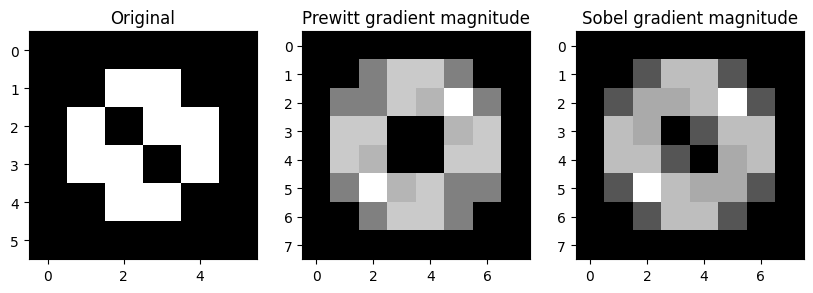

Prewitt gradient magnitude
[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.41 2.24 2.24 1.41 0.   0.  ]
 [0.   1.41 1.41 2.24 2.   2.83 1.41 0.  ]
 [0.   2.24 2.24 0.   0.   2.   2.24 0.  ]
 [0.   2.24 2.   0.   0.   2.24 2.24 0.  ]
 [0.   1.41 2.83 2.   2.24 1.41 1.41 0.  ]
 [0.   0.   1.41 2.24 2.24 1.41 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]

Sobel gradient magnitude
[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.41 3.16 3.16 1.41 0.   0.  ]
 [0.   1.41 2.83 2.83 3.16 4.24 1.41 0.  ]
 [0.   3.16 2.83 0.   1.41 3.16 3.16 0.  ]
 [0.   3.16 3.16 1.41 0.   2.83 3.16 0.  ]
 [0.   1.41 4.24 3.16 2.83 2.83 1.41 0.  ]
 [0.   0.   1.41 3.16 3.16 1.41 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [2]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

Im = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# Define the Prewitt masks
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Compute the gradients in the x and y directions using Prewitt masks using convolve2d
gradient_x_prewitt = convolve2d(Im, prewitt_horizontal)

gradient_y_prewitt = convolve2d(Im, prewitt_vertical)

# Calculate the gradient magnitude for Prewitt
gradient_magnitude_prewitt = np.sqrt(gradient_x_prewitt**2 + gradient_y_prewitt**2)

# Define the Sobel masks
sobel_horizontal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_vertical = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Compute the gradients in the x and y directions using Sobel masks
gradient_x_sobel = convolve2d(Im, sobel_horizontal)
gradient_y_sobel = convolve2d(Im, sobel_vertical)

# Calculate the gradient magnitude for Sobel
gradient_magnitude_sobel = np.sqrt(gradient_x_sobel**2 + gradient_y_sobel**2)

np.set_printoptions(precision=2)

#show them as images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(Im, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude_prewitt, cmap='gray')
plt.title('Prewitt gradient magnitude')
plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude_sobel, cmap='gray')
plt.title('Sobel gradient magnitude')
plt.show()

print("Prewitt gradient magnitude")
print(gradient_magnitude_prewitt)
print()
print("Sobel gradient magnitude")
print(gradient_magnitude_sobel)




**e)** How will you interpret the results with respect to edges in the test image?

Both filters were succesfully able to find conturns in the image. The edges of the central square and the transitions from 0 to 1 and from 1 to 0 in the checkerboard-like pattern are well-detected by both Prewitt and Sobel operators. The choice between Prewitt and Sobel may depend on the specific characteristics of the edges you want to emphasize, as Sobel may emphasize diagonal edges more due to its mask design as you can see in the result.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $8 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $12 \times 14$. 

<details>
<summary>
    <font size="3" color="green">
        <b>Click here for a small hint </b>
    </font>
</summary>
<div class="alert alert-block alert-info">
The test image can be created by the following numpy commands: 
    
```python
R = np.ones(shape=(8,8))
I = np.zeros(shape=(12,14))
I[2:10,3:11] = R
```
</div>
</details>

Use the notebook to do the necessary computations in the following questions.

Use the Prewitt masks:
$\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}$

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 


**Hint:** use `cv2.filter2D` function ([Documentation](https://www.docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)) to perform a convolutional operation on an image using a specific mask.

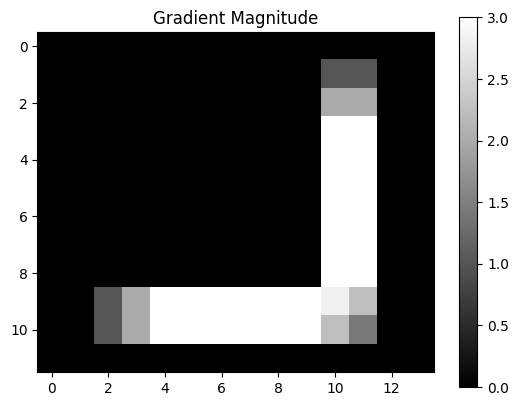

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

R = np.ones(shape=(8, 8))
I = np.zeros(shape=(12, 14), dtype=np.uint8)
I[2:10, 3:11] = R

# Define the Prewitt masks
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Compute the gradients in the x and y directions using Prewitt masks
gradient_x = cv2.filter2D(I, -1, prewitt_horizontal)
gradient_y = cv2.filter2D(I, -1, prewitt_vertical)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the gradient magnitude image
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.colorbar()
plt.show()


**b)** Sketch the histogram of gradient directions. Be precise in labeling the height of each bar in the histogram.

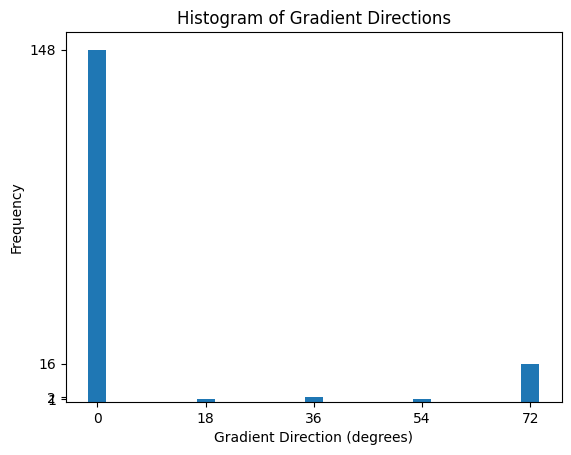

In [4]:
# Compute the gradients in the x and y directions using Prewitt masks
gradient_x = cv2.filter2D(I, -1, prewitt_horizontal)
gradient_y = cv2.filter2D(I, -1, prewitt_vertical)

# Calculate the gradient direction (angle) at each pixel
gradient_direction = np.arctan2(gradient_y, gradient_x)  # in radians

# Convert gradient directions to degrees
gradient_direction_degrees = np.degrees(gradient_direction)

# Create a histogram of gradient directions
hist, bins = np.histogram(gradient_direction_degrees, bins=5, range=(0, 90))

# Plot the histogram
plt.bar(bins[:-1], hist, width=3)

unique_ticks = np.unique(bins[:-1])
plt.xticks(unique_ticks)

unique_y_ticks = np.unique(hist)
plt.yticks(unique_y_ticks)

plt.title("Histogram of Gradient Directions")
plt.xlabel("Gradient Direction (degrees)")
plt.ylabel("Frequency")
plt.show()

**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.

The Laplacian can be computed using the following mask:
\begin{equation}
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


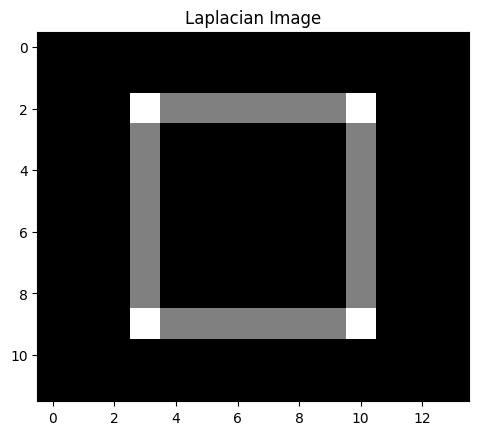

In [5]:
# Define the Laplacian mask
laplacian_mask = np.array([[0, -1, 0], 
                           [-1, 4, -1], 
                           [0, -1, 0]])

# Compute the Laplacian image using convolution
laplacian_image = cv2.filter2D(I, -1, laplacian_mask)

# Display the Laplacian image with relevant pixel values
plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Image")
plt.show()


**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    </font>
</summary>

- Import the <code>scipy</code>  package and use the <code>convolve2d</code> function (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">Documentation</a>) for this task.

- If you want to check if the resulting mask is correct, use the built-in cv2 <code>cv2.Laplacian(I, -1, ksize=5)</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6">Documentation</a>) where <code>I</code> is the test image and <code>ksize</code> is the aperture size used to compute the second-derivative filters.
</details>

[[  2.   2.   1.   2.   2.]
 [  2.   0.  -4.   0.   2.]
 [  1.  -4. -12.  -4.   1.]
 [  2.   0.  -4.   0.   2.]
 [  2.   2.   1.   2.   2.]]


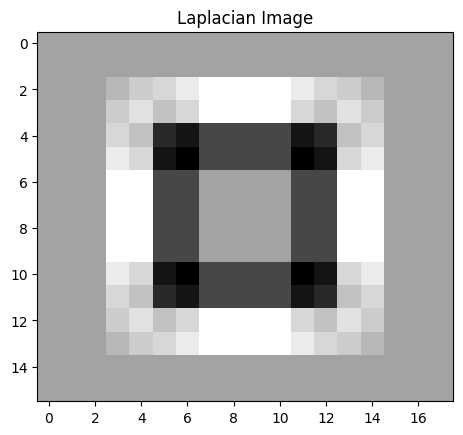

In [22]:
from scipy.signal import convolve2d

# Define the Prewitt masks
prewitt_x = np.array([[1, 0, -1], 
                      [1, 0, -1], 
                      [1, 0, -1]], dtype=np.float32)

prewitt_y = np.array([[1, 1, 1], 
                      [0, 0, 0], 
                      [-1, -1, -1]], dtype=np.float32)

p_X = np.array([1, 0, -1])

# convolve p_x with itself
convolved_p_x = convolve2d(prewitt_x, prewitt_x)
convolved_p_y = convolve2d(prewitt_y, prewitt_y)

laplacian_filter = convolved_p_x + convolved_p_y

print(laplacian_filter)

laplacian_image = convolve2d(I, laplacian_filter)

plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Image")
plt.show()

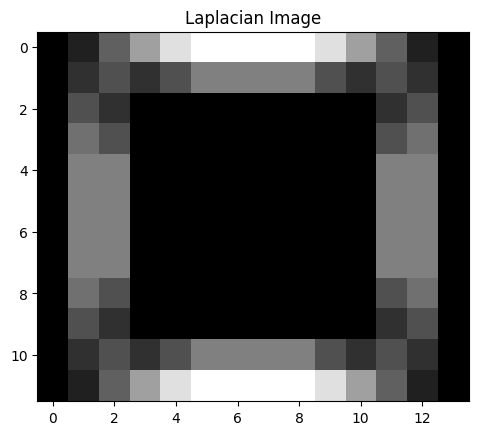

In [25]:
laplacian_image = cv2.Laplacian(I, -1, ksize=5)

plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Image")
plt.show()


## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h05**: $\sigma = 0.5$, $K = 7$

**b)** **h1**: $\sigma = 1$, $K = 11$

**c)** **h15**: $\sigma = 1.5$, $K = 15$

Use the `plt.stem` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

**d)** Show the result for c) above when $K = 7$.

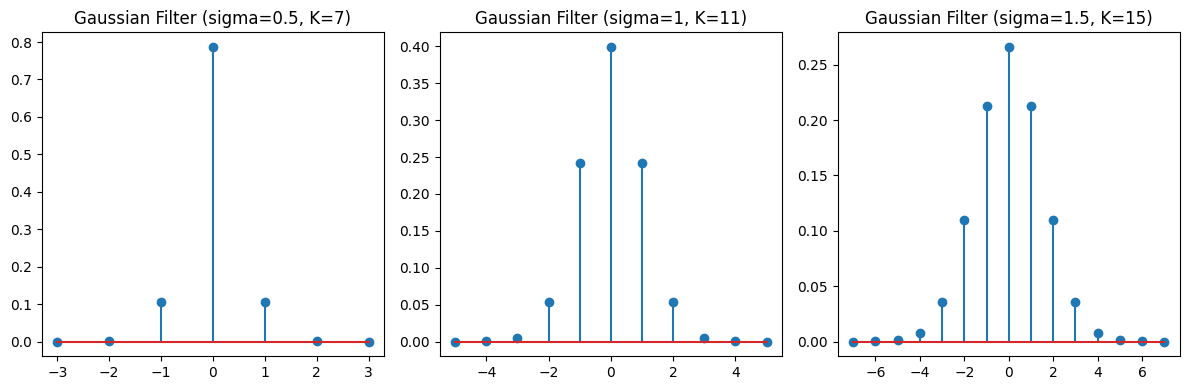

In [8]:
# Define the standard deviations and sizes for the Gaussian filters
sigma05, K05 = 0.5, 7
sigma1, K1 = 1, 11
sigma15, K15 = 1.5, 15

# Create 1D Gaussian filter masks using cv2.getGaussianKernel
h05 = cv2.getGaussianKernel(K05, sigma05)
h1 = cv2.getGaussianKernel(K1, sigma1)
h15 = cv2.getGaussianKernel(K15, sigma15)

# Create a range of indices for plotting
x05 = np.arange(-(K05 // 2), (K05 // 2) + 1)
x1 = np.arange(-(K1 // 2), (K1 // 2) + 1)
x15 = np.arange(-(K15 // 2), (K15 // 2) + 1)

# Plot the Gaussian filters using plt.stem
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.stem(x05, h05)
plt.title("Gaussian Filter (sigma=0.5, K=7)")

plt.subplot(132)
plt.stem(x1, h1)
plt.title("Gaussian Filter (sigma=1, K=11)")

plt.subplot(133)
plt.stem(x15, h15)
plt.title("Gaussian Filter (sigma=1.5, K=15)")

plt.tight_layout()
plt.show()



## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 
```python
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels
```

**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problems 3a, 3b, and 3c. Explain the results.


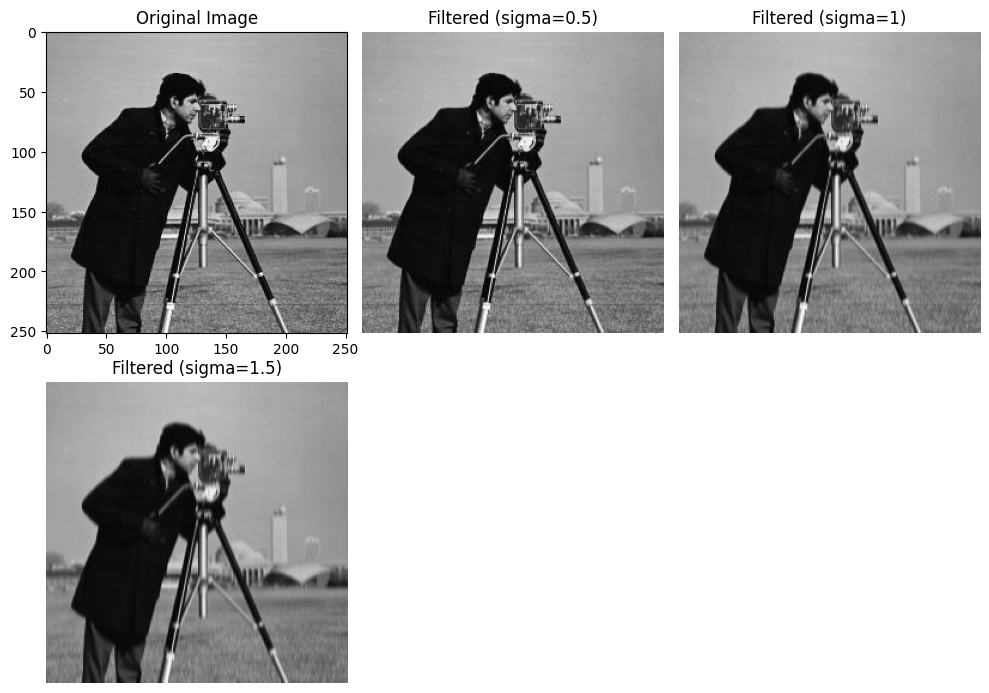

In [9]:
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels

#apply filters h05  h1  h15
Im_h05 = cv2.filter2D(Im, -1, h05)
Im_h1 = cv2.filter2D(Im, -1, h1)
Im_h15 = cv2.filter2D(Im, -1, h15)

#plot
plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
plt.imshow(Im, cmap='gray')
plt.title("Original Image")


plt.subplot(2, 3, 2)
plt.imshow(Im_h05, cmap='gray')
plt.title("Filtered (sigma=0.5)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(Im_h1, cmap='gray')
plt.title("Filtered (sigma=1)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(Im_h15, cmap='gray')
plt.title("Filtered (sigma=1.5)")
plt.axis('off')

plt.tight_layout()
plt.show()


- Smaller sigma values, such as 0.5 (filter a), result in a narrow Gaussian filter. A narrow filter has less smoothing effect and primarily removes high-frequency noise. The kernel size, K05 = 7, means that a 7x7 Gaussian filter mask will be applied to the image.
Applying this filter will moderately smooth the image, reducing noise, and making it slightly blurred, but still preserving most of the fine details and edges.

- A larger sigma value of 1 (filter b) results in a broader Gaussian filter compared to the first filter. It has a more pronounced smoothing effect.
The kernel size, K1 = 11, indicates that an 11x11 Gaussian filter mask will be applied.
Applying this filter will result in more significant smoothing compared to the first filter. It will reduce noise further but may also blur the image more noticeably, causing a reduction in fine details and edges.

- An even larger sigma value of 1.5 (filter c) leads to an even broader Gaussian filter, which results in stronger smoothing.
The kernel size, K15 = 15, implies that a 15x15 Gaussian filter mask will be applied.
Applying this filter will have the most pronounced smoothing effect among the three filters. It will effectively reduce noise but will also blur the image considerably, leading to a loss of finer details and edges. This filter is suitable when you want a highly smoothed or heavily blurred version of the image.

The choice of sigma and kernel size when applying Gaussian smoothing determines the trade-off between noise reduction and preservation of image details. Smaller sigma values and smaller kernel sizes provide lighter smoothing with more detail preservation, while larger sigma values and larger kernel sizes result in stronger smoothing with more significant detail loss.
In our case applying it to a non noisy image will result in a blurred image with different levels of blur depending on the filter used.

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_gauss`. Explain the results.

**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?


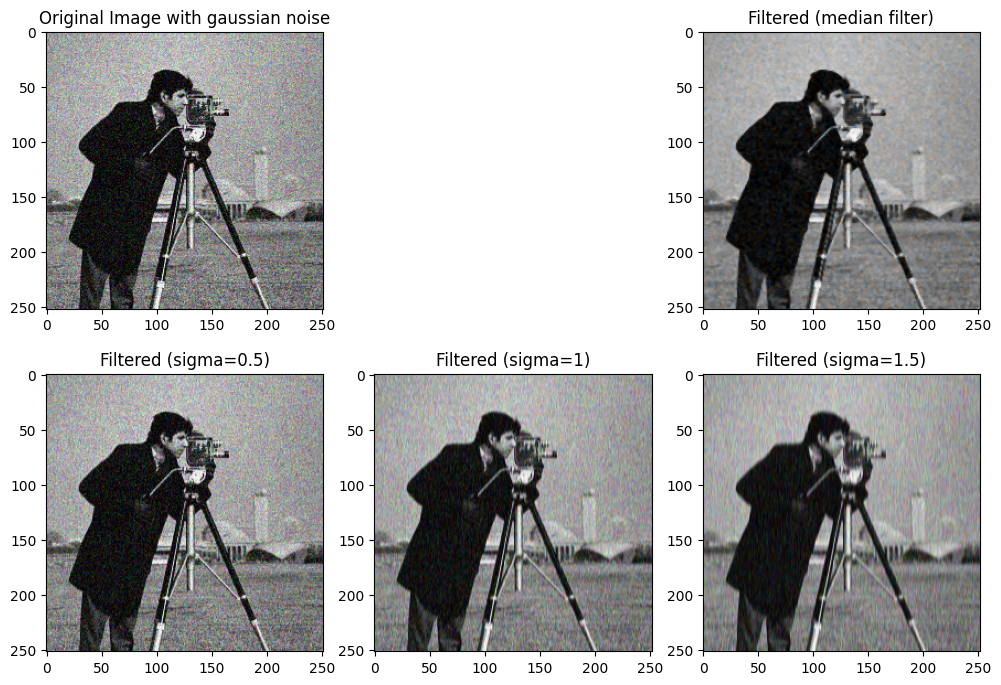

In [10]:
#apply median filter scipy.ndimage.median_filter
from scipy import ndimage

Im_med_filter = ndimage.median_filter(Im_gauss, size=3)

#apply filters h05  h1  h15
Im_h05 = cv2.filter2D(Im_gauss, -1, h05)
Im_h1 = cv2.filter2D(Im_gauss, -1, h1)
Im_h15 = cv2.filter2D(Im_gauss, -1, h15)

# Plot the first image alone
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 1)
plt.imshow(Im_gauss, cmap='gray')
plt.title("Original Image with gaussian noise")

# Filtered Images (Gaussian Noise, sigma=0.5)
plt.subplot(2, 3, 4)

plt.imshow(Im_h05, cmap='gray')
plt.title("Filtered (sigma=0.5)")

# Filtered Images (Gaussian Noise, sigma=1)
plt.subplot(2, 3, 5)
plt.imshow(Im_h1, cmap='gray')
plt.title("Filtered (sigma=1)")

# Filtered Images (Gaussian Noise, sigma=1.5)
plt.subplot(2, 3, 6)
plt.imshow(Im_h15, cmap='gray')
plt.title("Filtered (sigma=1.5)")

plt.subplot(2, 3, 3)
plt.imshow(Im_med_filter, cmap='gray')
plt.title("Filtered (median filter)")

plt.tight_layout()
plt.show()

Gaussian smoothing filters are linear filters that blur the image and can reduce Gaussian noise but may also result in some loss of detail.
Median filters are non-linear filters that are especially good at removing salt-and-pepper noise while preserving edges and fine details.
In our case the image only has contains Gaussian noise, using Gaussian smoothing filters with an appropriate sigma value may provide a smoother result with some detail preservation.

In this specific case I think that the filter b (sigma = 1, K = 11) is the best choice because it provides a good balance between noise reduction and detail preservation. The median filter provide the second best result in terms of noise reduction but it also introduces some artifacts in the image, in this case for example the face of the subject gets completely flattened and the details of the hair are lost.


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_SP`. Explain the results.

**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

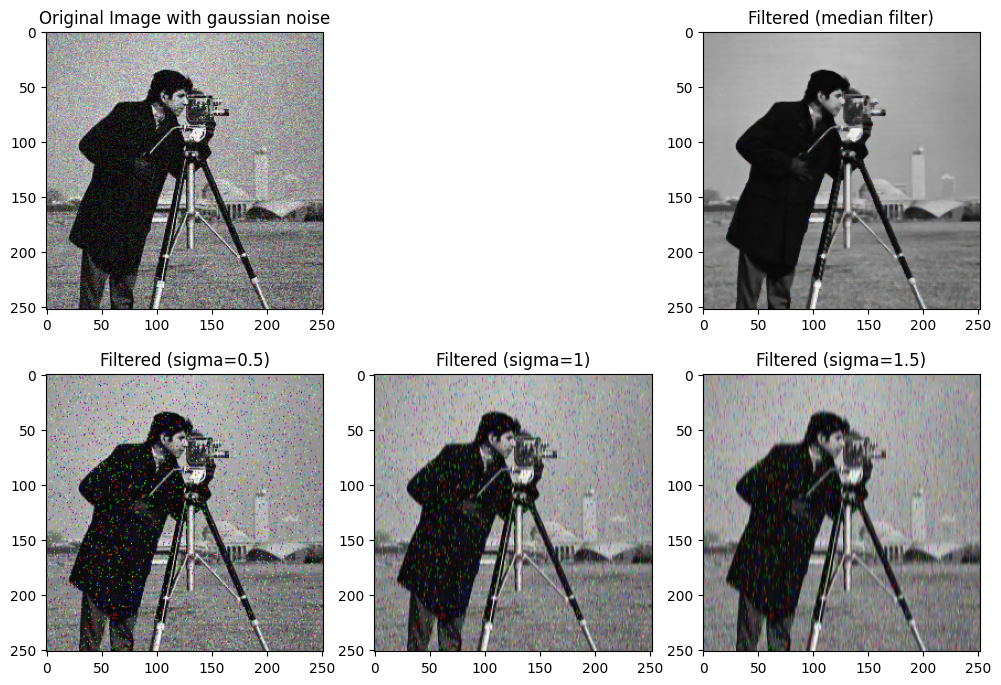

In [11]:
#Apply the three Gaussian filters to the image `Im_SP`

#apply filters h05  h1  h15
Im_h05 = cv2.filter2D(Im_SP, -1, h05)
Im_h1 = cv2.filter2D(Im_SP, -1, h1)
Im_h15 = cv2.filter2D(Im_SP, -1, h15)

Im_med_filter = ndimage.median_filter(Im_SP, size=3)

# Plot the first image alone
plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 1)
plt.imshow(Im_gauss, cmap='gray')
plt.title("Original Image with gaussian noise")

# Filtered Images (Gaussian Noise, sigma=0.5)
plt.subplot(2, 3, 4)

plt.imshow(Im_h05, cmap='gray')
plt.title("Filtered (sigma=0.5)")

# Filtered Images (Gaussian Noise, sigma=1)
plt.subplot(2, 3, 5)
plt.imshow(Im_h1, cmap='gray')
plt.title("Filtered (sigma=1)")

# Filtered Images (Gaussian Noise, sigma=1.5)
plt.subplot(2, 3, 6)
plt.imshow(Im_h15, cmap='gray')
plt.title("Filtered (sigma=1.5)")

plt.subplot(2, 3, 3)
plt.imshow(Im_med_filter, cmap='gray')
plt.title("Filtered (median filter)")

plt.tight_layout()
plt.show()

Given the nature of the salt and pepper noise, the median filter is the best choice for noise reduction in this case. The Gaussian filters are not able to remove the noise effectively only having the effect of blurring while the median filter is able to remove the noise while preserving the details of the image.



### Delivery (dead line) on CANVAS: 29.09.2023 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
